In [22]:
import os

import tensorflow as tf
import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, Adadelta

In [2]:
training_data_path = os.getcwd()+"/Image_data/rps-train/"
validation_data_path = os.getcwd()+"/Image_data/rps-validate"

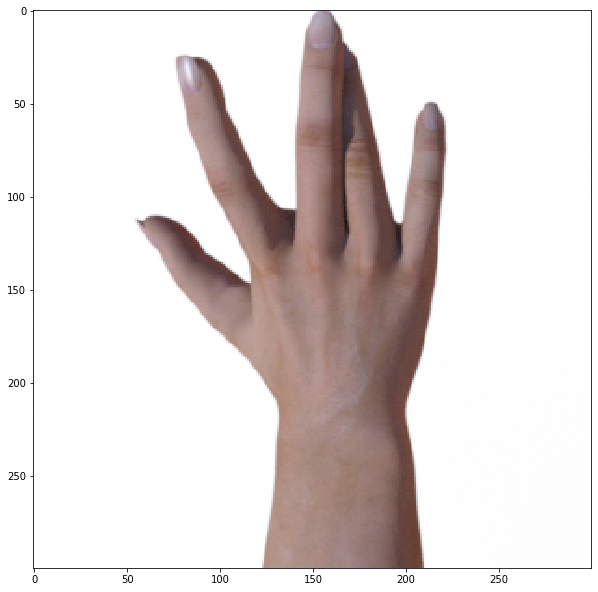

(300, 300, 4)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
plt.figure(figsize=(10,14))
image = plt.imread(training_data_path+"/paper/paper01-000.png")

# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()


print(images[0].shape)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print(
                "\n\n\nGot accuracy above 0.99% so cancelling any further training! \n\nas it might cause Overfitting\n\n"
            )
            self.model.stop_training = True


callback = myCallback()

In [15]:
class MultiClassNeuralNetwork():
    
    
    def modelBuilding(self,
                     training_data_path,
                     validation_data_path,
                      batch_size,
                     epochs,
                     learning_rate):
        
        train_datagen = ImageDataGenerator(rescale=1./255)
        
        train_generator = train_datagen.flow_from_directory(training_data_path,
                                                           target_size=(150,150),
                                                           batch_size=batch_size,
                                                           class_mode='categorical')
        
        validation_datagen = ImageDataGenerator(rescale=1./255)
        
        validation_generator = validation_datagen.flow_from_directory(validation_data_path,
                                                                    target_size=(150,150),
                                                                    batch_size=batch_size,
                                                                    class_mode='categorical')
        
        
        model = Sequential([
            tf.keras.layers.Conv2D(16, (3, 3),activation='relu',input_shape=(150, 150, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(3, activation='softmax')
        ])
        
        
        model.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
        
        
        model.summary()
                
        training_history = model.fit_generator(train_generator,
                            validation_data=validation_generator,
                            epochs=epochs,
                            verbose=1,
                            callbacks=[callback]
                                              )
        
        return training_history, model
    
    
    def __init__(self):
        pass
    

In [17]:
neuralNet = MultiClassNeuralNetwork()

'''
training_data_path,
validation_data_path,
batch_size,
epochs,
learning_rate
'''

history, model = neuralNet.modelBuilding(training_data_path,
                                    validation_data_path,
                                    20,
                                    25,
                                    0.01)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 32)        0         
_____________________________________

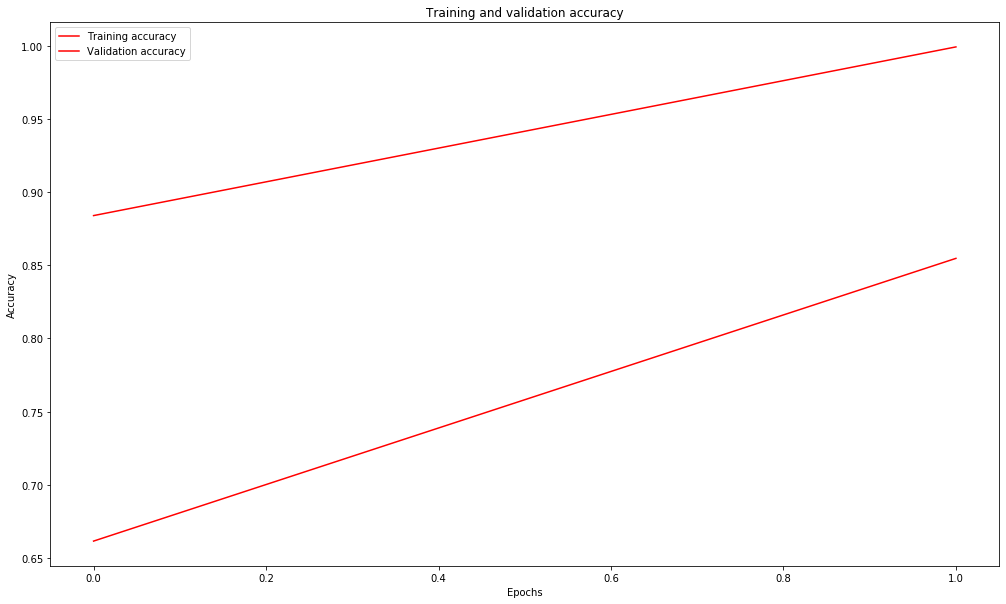

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(17,10))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

loss
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)

plt.show()